# Imports

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

from utils import union_datas, load_parquets, info_sum_isna, add_ses_income, add_ses_points

# Loading the dataset

In [2]:
cols_used = ['NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
             'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
             'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
             'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
             'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
             'NU_NOTA_MT', 'NU_NOTA_COMP1',
             'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
             'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
             'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
             'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
             'Q023', 'Q024', 'Q025']

In [3]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

In [46]:
test = False

In [47]:
df_enem = union_datas(years, cols_used, test=test)

File: ../datasets/microdados_anos/MICRODADOS_ENEM_2015.csv
File: ../datasets/microdados_anos/MICRODADOS_ENEM_2016.csv
File: ../datasets/microdados_anos/MICRODADOS_ENEM_2017.csv
File: ../datasets/microdados_anos/MICRODADOS_ENEM_2018.csv
File: ../datasets/microdados_anos/MICRODADOS_ENEM_2019.csv
File: ../datasets/microdados_anos/MICRODADOS_ENEM_2020.csv


In [48]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
df_enem.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,2015.0,Gravataí,RS,42.0,M,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,657.4,705.3,591.1,732.3,160.0,160.0,120.0,160.0,160.0,760.0,A,A,A,A,3.0,D,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B
1,2015.0,Montes Claros,MG,21.0,M,1.0,5.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,E,E,C,B,3.0,B,A,C,D,A,B,B,A,A,A,A,A,A,B,B,A,D,B,B,B
2,2015.0,Olinda,PE,22.0,M,4.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,528.5,531.1,511.3,566.5,120.0,120.0,120.0,140.0,140.0,640.0,E,C,D,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,B,B,A
3,2015.0,Belo Horizonte,MG,23.0,F,1.0,6.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,E,E,F,F,3.0,F,A,B,D,B,A,B,A,B,A,B,A,A,C,A,B,D,B,B,B
4,2015.0,Teófilo Otoni,MG,18.0,M,1.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,679.9,730.6,621.2,732.4,160.0,160.0,160.0,180.0,140.0,800.0,B,C,C,A,5.0,G,A,B,C,B,B,B,A,B,A,A,A,B,B,A,A,C,B,B,B


# Pre-processing

In [50]:
# info_sum_isna(df_enem)

In [51]:
df_enem = df_enem.dropna()

In [52]:
# info_sum_isna(df_enem)

# Social Economic Status (SES)

## Income 

- Family income is categorized from A to Q, ranging from 1 to 10 minimum wages.
- To classify we will use the per capita income of the family.

In [53]:
meta = dict(zip(df_enem.columns, df_enem._meta.dtypes))

In [54]:
 int_columns = ['NU_ANO',
                   'NU_IDADE',
                   'TP_ST_CONCLUSAO',
                   'TP_ANO_CONCLUIU',
                   'TP_ESCOLA',
                   'TP_ESTADO_CIVIL',
                   'TP_COR_RACA',
                   'TP_PRESENCA_CN',
                   'TP_PRESENCA_CH',
                   'TP_PRESENCA_LC',
                   'TP_PRESENCA_MT',
                   'Q005']

for column in int_columns:
    meta[column] = 'int16'

In [55]:
meta['TP_SES_INCOME'] = 'O'
df_enem['TP_SES_INCOME'] = ''

In [56]:
df_enem = df_enem.apply(lambda x: add_ses_income(x), axis=1, meta=meta)

In [57]:
df_enem.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME
0,2015.0,Gravataí,RS,42.0,M,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,657.4,705.3,591.1,732.3,160.0,160.0,120.0,160.0,160.0,760.0,A,A,A,A,3.0,D,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,E
2,2015.0,Olinda,PE,22.0,M,4.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,528.5,531.1,511.3,566.5,120.0,120.0,120.0,140.0,140.0,640.0,E,C,D,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,B,B,A,E
4,2015.0,Teófilo Otoni,MG,18.0,M,1.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,679.9,730.6,621.2,732.4,160.0,160.0,160.0,180.0,140.0,800.0,B,C,C,A,5.0,G,A,B,C,B,B,B,A,B,A,A,A,B,B,A,A,C,B,B,B,E
5,2015.0,Canelinha,SC,19.0,M,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,598.7,658.0,579.0,576.4,120.0,80.0,100.0,120.0,60.0,480.0,D,C,B,F,4.0,F,A,D,C,B,A,B,B,B,A,B,A,B,D,A,B,D,B,C,B,E
6,2015.0,Guarulhos,SP,17.0,F,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,652.1,671.9,609.3,685.5,180.0,160.0,160.0,160.0,160.0,820.0,F,F,E,E,3.0,J,A,B,C,B,A,B,B,B,B,B,A,B,C,B,B,D,B,C,B,D


## Points System


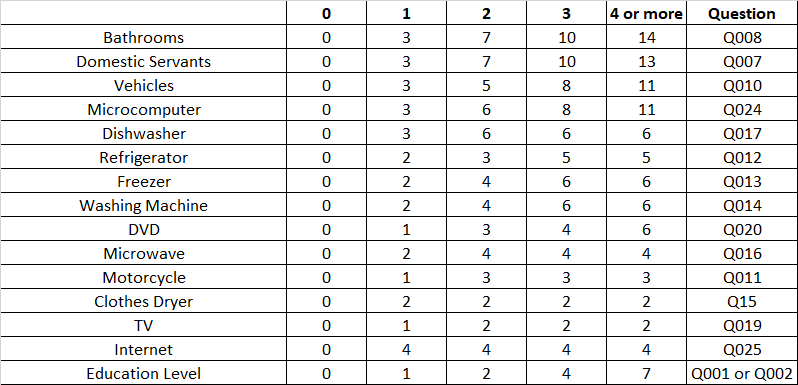


    	Q001 ou Q002
    - 0: Unlettered / Elementary I Incomplete
    - 1: Elementary I Complete / Elementary II Incomplete
    - 2: Elementary II Complete / High School Incomplete
    - 4: High School Complete / University Incomplete
    - 7: University Complete


In [58]:
meta['TP_SES_POINTS'] = 'O'
df_enem['TP_SES_POINTS'] = ''

In [59]:
df_enem = df_enem.apply(lambda x: add_ses_points(x), axis=1, meta=meta)

In [60]:
df_enem.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME,TP_SES_POINTS
0,2015.0,Gravataí,RS,42.0,M,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,657.4,705.3,591.1,732.3,160.0,160.0,120.0,160.0,160.0,760.0,A,A,A,A,3.0,D,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,E,C2
2,2015.0,Olinda,PE,22.0,M,4.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,528.5,531.1,511.3,566.5,120.0,120.0,120.0,140.0,140.0,640.0,E,C,D,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,B,B,A,E,DE
4,2015.0,Teófilo Otoni,MG,18.0,M,1.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,679.9,730.6,621.2,732.4,160.0,160.0,160.0,180.0,140.0,800.0,B,C,C,A,5.0,G,A,B,C,B,B,B,A,B,A,A,A,B,B,A,A,C,B,B,B,E,C2
5,2015.0,Canelinha,SC,19.0,M,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,598.7,658.0,579.0,576.4,120.0,80.0,100.0,120.0,60.0,480.0,D,C,B,F,4.0,F,A,D,C,B,A,B,B,B,A,B,A,B,D,A,B,D,B,C,B,E,B2
6,2015.0,Guarulhos,SP,17.0,F,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,652.1,671.9,609.3,685.5,180.0,160.0,160.0,160.0,160.0,820.0,F,F,E,E,3.0,J,A,B,C,B,A,B,B,B,B,B,A,B,C,B,B,D,B,C,B,D,B2


In [61]:
df_enem.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 51 entries, NU_ANO to TP_SES_POINTS
dtypes: object(29), float64(10), int16(12)

# Save

In [62]:
#%%time   --- Wall time: 2h 25min 15s

test = "_test" if test_data else ""

for year in years:

    path = f'../datasets/integrated_datas_{year}{test}.parquet.gzip'

    df_enem_year = df_enem[df_enem['NU_ANO'] == year]
    df_enem_year.to_parquet(path, engine='fastparquet', compression='gzip', write_index=False)

# Load parquet files

In [85]:
test_data = False
test = "_test" if test_data else ""
test

''

In [86]:
grade_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [89]:
df = pd.DataFrame([])
for year in years:
    path = f'../datasets/integrated_datas_{year}{test}.parquet.gzip'
    df_parquet = dd.read_parquet(path, ignore_metadata_file=True, columns=cols_used)
    df_parquet['NU_NOTA_SUM'] = df_parquet[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)
    df_parquet = df_parquet.sort_values('NU_NOTA_SUM', ascending=False)
    current_df = df_parquet.head(10000)
    df = pd.concat([df, current_df])
df.to_parquet(f'../datasets/integrated_10000_top_grade_data{test}.parquet.gzip', engine='fastparquet', compression='gzip', index=False)

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\dask\dataframe\core.py:7116: UserWarning: Insufficient elements for `head`. 10000 elements requested, only 277 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\dask\dataframe\core.py:7116: UserWarning: Insufficient elements for `head`. 10000 elements requested, only 293 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\dask\dataframe\core.py:7116: UserWarning: Insufficient elements for `head`. 10000 elements requested, only 328 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
d:\Users\dav\anaconda3\envs\pos\lib\site-packages\dask\dataframe\core.py:7116: UserWarning: Insufficient elements for `head`. 10000 elements requested, only 248 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
d:\Users\dav\anaconda3\envs\pos\

In [88]:
df_parquet.head(1000)

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_SUM
35183,2020,Piracicaba,SP,3,M,1,1,1,1,1,1,1,1,1,795.8,839.5,739.1,938.5,200.0,200.0,200.0,180.0,200.0,980.0,F,F,D,D,3,I,A,D,D,C,A,B,B,B,A,B,A,B,B,B,B,D,B,D,B,4292.9
33931,2020,Curitiba,PR,5,M,1,1,1,3,1,1,1,1,1,774.3,805.4,749.6,975.0,180.0,200.0,200.0,180.0,200.0,960.0,E,F,D,E,3,O,A,C,C,C,A,B,B,B,B,B,A,B,C,A,B,E,A,B,B,4264.3
44563,2020,Rio de Janeiro,RJ,2,M,1,1,2,0,3,1,1,1,1,795.8,839.5,713.5,975.0,160.0,180.0,200.0,200.0,200.0,940.0,G,G,E,E,4,Q,D,D,D,C,A,C,B,B,B,B,B,B,E,B,B,E,B,E,B,4263.8
37288,2020,Fortaleza,CE,3,M,1,1,1,1,1,1,1,1,1,808.8,811.9,721.8,975.0,180.0,200.0,200.0,200.0,160.0,940.0,G,F,E,E,4,Q,A,E,E,C,A,B,B,B,A,B,A,B,E,B,B,E,B,D,B,4257.5
24855,2020,São Paulo,SP,2,F,1,1,2,0,3,1,1,1,1,800.8,862.6,716.9,896.4,180.0,200.0,200.0,200.0,200.0,980.0,F,G,D,D,2,I,A,B,C,B,A,B,B,B,A,B,A,B,C,B,A,C,A,C,B,4256.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26539,2020,Brasília,DF,3,M,1,1,1,1,1,1,1,1,1,734.1,740.3,658.2,958.4,180.0,200.0,180.0,200.0,200.0,960.0,G,F,D,D,3,K,A,C,D,C,A,B,B,B,A,B,A,B,D,A,B,D,A,B,B,4051.0
28822,2020,Niterói,RJ,5,M,1,4,1,2,1,1,1,1,1,784.9,728.4,628.2,929.5,200.0,200.0,180.0,200.0,200.0,980.0,F,G,E,D,3,G,A,C,D,A,A,B,B,B,A,B,A,A,C,A,A,D,A,C,B,4051.0
30873,2020,Jaú,SP,2,F,1,1,2,0,3,1,1,1,1,759.3,740.4,681.3,910.0,180.0,180.0,200.0,200.0,200.0,960.0,G,F,E,F,3,J,A,D,C,C,A,C,C,B,A,B,B,B,B,B,B,D,B,C,B,4051.0
18603,2020,Goiânia,GO,4,M,1,1,1,1,1,1,1,1,1,764.5,764.2,677.0,925.2,160.0,200.0,180.0,180.0,200.0,920.0,G,G,E,E,4,Q,B,C,D,B,A,B,B,B,A,B,A,A,B,A,A,B,A,A,B,4050.9
